In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
students = pd.read_csv("../Datasets/students.csv")
print(students.shape)
students

(10933, 24)


,Matricule,Annee_academique,Niveau,Cursus,Filiere,Age,Annee_naissance,Genre,Distance_domicile_ecole,Travaille,...,Moyenne_S1,Moyenne_S2,Moyenne_annuelle,Nb_matieres_validees,Nb_credits_obtenus,Nb_matieres_non_validees,Nb_heures_cours_total,Nb_heures_presence,Nb_projets,Reussite
0,20G21802,2020/2021,1,ING,Tronc_commun,18,2002,F,<5km,OUI,...,12.04,12.38,12.21,18,54,2,420,350,3,1
1,20G38199,2020/2021,1,ING,Tronc_commun,19,2001,F,<5km,NON,...,16.06,16.13,16.09,19,57,1,420,372,3,1
2,20G16624,2020/2021,1,ING,Tronc_commun,18,2002,F,>15km,NON,...,12.15,11.70,11.92,18,54,2,420,330,3,1
3,20G95755,2020/2021,1,ING,Tronc_commun,19,2001,F,5-15km,NON,...,10.28,10.94,10.61,18,54,2,420,398,3,1
4,20G80345,2020/2021,1,ING,Tronc_commun,17,2003,M,5-15km,NON,...,15.61,14.88,15.24,18,54,2,420,383,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10928,24G22183,2024/2025,3,SCI ING,CIBI,21,2003,F,5-15km,NON,...,9.81,12.96,11.38,20,60,0,420,384,4,1
10929,24G80829,2024/2025,3,SCI ING,SDIA,21,2003,M,<5km,OUI,...,14.16,15.23,14.70,20,60,0,410,239,5,1
10930,24G25868,2024/2025,3,SCI ING,GEE,22,2002,M,<5km,OUI,...,13.81,13.16,13.49,20,60,0,425,311,4,1
10931,24G90419,2024/2025,3,SCI ING,EEAT,21,2003,M,>15km,NON,...,15.56,15.24,15.40,19,57,1,420,404,4,1


In [ ]:
np.unique (students["Distance_domicile_ecole"])

array(['5-15km', '<5km', '>15km'], dtype=object)

In [3]:
# features ingeneering 

students["Taux_presence"] = students["Nb_heures_presence"]/students["Nb_heures_cours_total"]   # Ajout de la colonne ratio
students["Genre"] = students["Genre"] == "M"       # Dans Genre change M en True et F en False sachant que true =1 et False =0 car mon model ne travaille qu'avec des numeriques
students["Travaille"] = students["Travaille"] == "oui"   # Dans Travaille change oui en True eu non en False pour les même raisons qu'en haut 


distance_idx = []
for distance in students["Distance_domicile_ecole"] : 
    if distance == "<5km" :
        distance_idx.append(1)
    elif distance == "5-15km" :
        distance_idx.append(2)
    else :
        distance_idx.append(3)

students["Distance_domicile_ecole"] = distance_idx

students_base = students.drop(["Nb_heures_presence","Nb_heures_cours_total","Reussite"],axis = 1)
students_base["Reussite"] = students["Reussite"]

In [4]:
students_base

,Matricule,Annee_academique,Niveau,Cursus,Filiere,Age,Annee_naissance,Genre,Distance_domicile_ecole,Travaille,...,Note_moy_SN_S2,Moyenne_S1,Moyenne_S2,Moyenne_annuelle,Nb_matieres_validees,Nb_credits_obtenus,Nb_matieres_non_validees,Nb_projets,Taux_presence,Reussite
0,20G21802,2020/2021,1,ING,Tronc_commun,18,2002,False,1,False,...,12.40,12.04,12.38,12.21,18,54,2,3,0.833333,1
1,20G38199,2020/2021,1,ING,Tronc_commun,19,2001,False,1,False,...,15.50,16.06,16.13,16.09,19,57,1,3,0.885714,1
2,20G16624,2020/2021,1,ING,Tronc_commun,18,2002,False,3,False,...,12.37,12.15,11.70,11.92,18,54,2,3,0.785714,1
3,20G95755,2020/2021,1,ING,Tronc_commun,19,2001,False,2,False,...,11.04,10.28,10.94,10.61,18,54,2,3,0.947619,1
4,20G80345,2020/2021,1,ING,Tronc_commun,17,2003,True,2,False,...,14.70,15.61,14.88,15.24,18,54,2,3,0.911905,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10928,24G22183,2024/2025,3,SCI ING,CIBI,21,2003,False,2,False,...,13.28,9.81,12.96,11.38,20,60,0,4,0.914286,1
10929,24G80829,2024/2025,3,SCI ING,SDIA,21,2003,True,1,False,...,15.42,14.16,15.23,14.70,20,60,0,5,0.582927,1
10930,24G25868,2024/2025,3,SCI ING,GEE,22,2002,True,1,False,...,12.66,13.81,13.16,13.49,20,60,0,4,0.731765,1
10931,24G90419,2024/2025,3,SCI ING,EEAT,21,2003,True,3,False,...,16.23,15.56,15.24,15.40,19,57,1,4,0.961905,1


In [5]:
students_base.to_csv ("../Datasets/students_data.csv", index = False)

In [1]:
import pandas as pd

In [2]:
import sys

chemin_projet = r"..\Models\explication des performances"    # chemin jusqu'au dossier contenant le fichier
sys.path.insert(0, chemin_projet)

from DBSCAN import DBSCAN

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# PCA MANUEL
# ============================================================

def pca_manual(X, n_components=2):
    """PCA simple et robuste"""
    X = np.array(X, dtype=np.float64)
    
    # Centrer
    mean = np.mean(X, axis=0)
    X_centered = X - mean
    
    # Covariance
    cov = np.cov(X_centered.T)
    
    # Valeurs et vecteurs propres
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)
    
    # Trier
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Projection
    components = eigenvectors[:, :n_components]
    X_pca = X_centered.dot(components)
    
    # Variance expliquée
    var_explained = eigenvalues[:n_components] / eigenvalues.sum()
    
    return X_pca, var_explained


# ============================================================
# VISUALISATION PRINCIPALE
# ============================================================

def visualiser_clusters(X, labels, taille_points=8, transparence=0.4):
    """
    Visualise les clusters DBSCAN de manière claire
    
    Paramètres:
    -----------
    X : vos données (n_samples, n_features)
    labels : vos labels DBSCAN (n_samples,)
    taille_points : taille des points (default=8, réduire si trop dense)
    transparence : 0 à 1 (default=0.4, plus petit = plus transparent)
    """
    
    try:
        # Convertir en arrays numpy
        X = np.array(X, dtype=np.float64)
        labels = np.array(labels, dtype=np.int32)
        
        n_points = len(labels)
        n_features = X.shape[1]
        
        print(f"\n{'='*60}")
        print(f"VISUALISATION DBSCAN")
        print(f"{'='*60}")
        print(f"Points totaux : {n_points}")
        print(f"Features : {n_features}")
        
        # PCA
        X_2d, var_exp = pca_manual(X, n_components=2)
        var_total = var_exp[0] + var_exp[1]
        
        print(f"Variance expliquée PCA : {var_total*100:.1f}%")
        
        # Infos clusters
        labels_uniques = np.unique(labels)
        n_clusters = len(labels_uniques[labels_uniques != -1])
        n_bruit = np.sum(labels == -1)
        
        print(f"Clusters trouvés : {n_clusters}")
        print(f"Points de bruit : {n_bruit} ({n_bruit/n_points*100:.1f}%)")
        print(f"{'='*60}\n")
        
        # Couleurs
        couleurs = plt.cm.tab20(np.linspace(0, 1, max(n_clusters, 1)))
        
        # GRAPHIQUE 1 : Vue d'ensemble
        fig = plt.figure(figsize=(18, 7))
        
        # Subplot 1 : Scatter plot
        ax1 = fig.add_subplot(1, 2, 1)
        
        idx_couleur = 0
        for lab in sorted(labels_uniques):
            masque = (labels == lab)
            n_pts = np.sum(masque)
            
            if lab == -1:
                # Bruit en rouge
                ax1.scatter(X_2d[masque, 0], X_2d[masque, 1],
                           c='red', marker='x', s=taille_points*3,
                           alpha=min(transparence*2, 0.7), linewidths=1.5,
                           label=f'Bruit ({n_pts})')
            else:
                # Clusters
                ax1.scatter(X_2d[masque, 0], X_2d[masque, 1],
                           c=[couleurs[idx_couleur]], s=taille_points,
                           alpha=transparence, edgecolors='none',
                           label=f'C{lab} ({n_pts})')
                idx_couleur += 1
        
        ax1.set_xlabel(f'PC1 ({var_exp[0]*100:.1f}%)', fontsize=12, weight='bold')
        ax1.set_ylabel(f'PC2 ({var_exp[1]*100:.1f}%)', fontsize=12, weight='bold')
        ax1.set_title('Clusters DBSCAN (Vue d\'ensemble)', fontsize=14, weight='bold', pad=15)
        ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)
        ax1.grid(True, alpha=0.25, linestyle='--', linewidth=0.5)
        
        # Subplot 2 : Distribution
        ax2 = fig.add_subplot(1, 2, 2)
        
        tailles_clusters = []
        noms_clusters = []
        couleurs_bars = []
        
        for lab in sorted(labels_uniques):
            compte = np.sum(labels == lab)
            
            if lab == -1:
                noms_clusters.append('Bruit')
                tailles_clusters.append(compte)
                couleurs_bars.append('red')
            else:
                noms_clusters.append(f'C{lab}')
                tailles_clusters.append(compte)
                couleurs_bars.append('steelblue')
        
        barres = ax2.bar(range(len(tailles_clusters)), tailles_clusters,
                        color=couleurs_bars, alpha=0.7, edgecolor='black', linewidth=1.2)
        
        ax2.set_xticks(range(len(tailles_clusters)))
        ax2.set_xticklabels(noms_clusters, rotation=45, ha='right', fontsize=10)
        ax2.set_ylabel('Nombre de points', fontsize=12, weight='bold')
        ax2.set_title('Distribution des points', fontsize=14, weight='bold', pad=15)
        ax2.grid(True, axis='y', alpha=0.25, linestyle='--', linewidth=0.5)
        
        # Ajouter nombres sur barres
        for barre, taille in zip(barres, tailles_clusters):
            hauteur = barre.get_height()
            ax2.text(barre.get_x() + barre.get_width()/2., hauteur,
                    f'{taille}', ha='center', va='bottom', fontsize=9, weight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Afficher stats
        afficher_stats(labels)
        
        print("✅ Visualisation réussie !\n")
        
    except Exception as e:
        print(f"❌ ERREUR : {e}")
        import traceback
        traceback.print_exc()


# ============================================================
# VISUALISATION SÉPARÉE PAR CLUSTER
# ============================================================

def visualiser_clusters_separes(X, labels, taille_points=10, transparence=0.5):
    """
    Affiche chaque cluster séparément (plus lisible pour beaucoup de clusters)
    """
    
    try:
        X = np.array(X, dtype=np.float64)
        labels = np.array(labels, dtype=np.int32)
        
        print(f"\n{'='*60}")
        print(f"VISUALISATION SÉPARÉE PAR CLUSTER")
        print(f"{'='*60}\n")
        
        # PCA
        X_2d, var_exp = pca_manual(X, n_components=2)
        
        labels_uniques = np.unique(labels)
        clusters_seuls = labels_uniques[labels_uniques != -1]
        n_clusters = len(clusters_seuls)
        
        if n_clusters == 0:
            print("⚠️  Aucun cluster trouvé (seulement du bruit)")
            return
        
        # Layout
        n_cols = min(4, n_clusters)
        n_lignes = int(np.ceil(n_clusters / n_cols))
        
        fig, axes = plt.subplots(n_lignes, n_cols, figsize=(5*n_cols, 4*n_lignes))
        
        # S'assurer que axes est toujours un array 2D
        if n_clusters == 1:
            axes = np.array([[axes]])
        elif n_lignes == 1:
            axes = axes.reshape(1, -1)
        elif n_cols == 1:
            axes = axes.reshape(-1, 1)
        
        couleurs = plt.cm.tab20(np.linspace(0, 1, n_clusters))
        
        for i, lab in enumerate(clusters_seuls):
            ligne = i // n_cols
            col = i % n_cols
            ax = axes[ligne, col]
            
            # Points du cluster actuel
            masque_actuel = (labels == lab)
            n_pts = np.sum(masque_actuel)
            
            ax.scatter(X_2d[masque_actuel, 0], X_2d[masque_actuel, 1],
                      c=[couleurs[i]], s=taille_points*1.5, alpha=transparence*1.2,
                      edgecolors='black', linewidths=0.3)
            
            # Autres points en gris très léger (contexte)
            masque_autres = (labels != lab) & (labels != -1)
            ax.scatter(X_2d[masque_autres, 0], X_2d[masque_autres, 1],
                      c='lightgray', s=taille_points*0.2, alpha=0.15, edgecolors='none')
            
            ax.set_title(f'Cluster {lab} ({n_pts} points)', fontsize=11, weight='bold')
            ax.set_xlabel(f'PC1', fontsize=9)
            ax.set_ylabel(f'PC2', fontsize=9)
            ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
        
        # Masquer axes vides
        for i in range(n_clusters, n_lignes * n_cols):
            ligne = i // n_cols
            col = i % n_cols
            axes[ligne, col].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        print("✅ Visualisation séparée réussie !\n")
        
    except Exception as e:
        print(f"❌ ERREUR : {e}")
        import traceback
        traceback.print_exc()


# ============================================================
# STATISTIQUES
# ============================================================

def afficher_stats(labels):
    """Affiche les statistiques détaillées"""
    
    try:
        labels = np.array(labels, dtype=np.int32)
        
        labels_uniques = np.unique(labels)
        n_total = len(labels)
        n_clusters = len(labels_uniques[labels_uniques != -1])
        n_bruit = np.sum(labels == -1)
        n_clustered = n_total - n_bruit
        
        print(f"\n{'='*60}")
        print(f"{'STATISTIQUES DÉTAILLÉES':^60}")
        print(f"{'='*60}")
        print(f"\n{'Total de points':<30} : {n_total}")
        print(f"{'Nombre de clusters':<30} : {n_clusters}")
        print(f"{'Points clusterisés':<30} : {n_clustered} ({n_clustered/n_total*100:.1f}%)")
        print(f"{'Points de bruit':<30} : {n_bruit} ({n_bruit/n_total*100:.1f}%)")
        
        print(f"\n{'-'*60}")
        print(f"{'DÉTAIL PAR CLUSTER':^60}")
        print(f"{'-'*60}")
        print(f"{'Cluster':<15} {'Nombre':<15} {'Pourcentage':<15}")
        print(f"{'-'*60}")
        
        for lab in sorted(labels_uniques):
            compte = np.sum(labels == lab)
            pourcent = (compte / n_total) * 100
            
            if lab == -1:
                print(f"{'Bruit':<15} {compte:<15} {pourcent:<15.2f}%")
            else:
                print(f"{'Cluster ' + str(lab):<15} {compte:<15} {pourcent:<15.2f}%")
        
        print(f"{'='*60}\n")
        
    except Exception as e:
        print(f"❌ ERREUR dans afficher_stats : {e}")
        import traceback
        traceback.print_exc()


# ============================================================
# SILHOUETTE SCORE
# ============================================================

def calculer_silhouette(X, labels):
    """Calcule le score de silhouette"""
    
    try:
        X = np.array(X, dtype=np.float64)
        labels = np.array(labels, dtype=np.int32)
        
        print(f"\n{'='*60}")
        print(f"CALCUL DU SILHOUETTE SCORE")
        print(f"{'='*60}\n")
        
        # Filtrer le bruit
        masque = (labels != -1)
        X_filtre = X[masque]
        labels_filtre = labels[masque]
        
        clusters_uniques = np.unique(labels_filtre)
        
        if len(clusters_uniques) < 2:
            print("⚠️  Moins de 2 clusters : impossible de calculer le score")
            return None
        
        n_samples = len(X_filtre)
        scores = np.zeros(n_samples)
        
        print(f"Calcul sur {n_samples} points (bruit exclu)...")
        
        for i in range(n_samples):
            cluster_actuel = labels_filtre[i]
            
            # Distance intra-cluster (a)
            masque_meme = (labels_filtre == cluster_actuel)
            n_meme = np.sum(masque_meme)
            
            if n_meme > 1:
                diff = X_filtre[masque_meme] - X_filtre[i]
                distances = np.sqrt(np.sum(diff * diff, axis=1))
                a_i = np.sum(distances) / (n_meme - 1)
            else:
                a_i = 0.0
            
            # Distance inter-cluster min (b)
            b_i = np.inf
            
            for autre_cluster in clusters_uniques:
                if autre_cluster != cluster_actuel:
                    masque_autre = (labels_filtre == autre_cluster)
                    diff = X_filtre[masque_autre] - X_filtre[i]
                    distances = np.sqrt(np.sum(diff * diff, axis=1))
                    dist_moyenne = np.mean(distances)
                    
                    if dist_moyenne < b_i:
                        b_i = dist_moyenne
            
            # Score silhouette
            if max(a_i, b_i) > 0:
                scores[i] = (b_i - a_i) / max(a_i, b_i)
        
        score_final = np.mean(scores)
        
        print(f"\n{'Score de Silhouette':<30} : {score_final:.4f}")
        print(f"\n{'Interprétation':<30} :")
        
        if score_final > 0.7:
            print("  ✅ Excellent (> 0.7)")
        elif score_final > 0.5:
            print("  ✅ Bon (0.5 - 0.7)")
        elif score_final > 0.25:
            print("  ⚠️  Moyen (0.25 - 0.5)")
        elif score_final > 0:
            print("  ⚠️  Faible (0 - 0.25)")
        else:
            print("  ❌ Mauvais (< 0)")
        
        print(f"\n{'='*60}\n")
        
        return score_final
        
    except Exception as e:
        print(f"❌ ERREUR : {e}")
        import traceback
        traceback.print_exc()
        return None


# ============================================================
# MESSAGE DE CONFIRMATION
# ============================================================

print("="*60)
print("✅ VISUALISATION DBSCAN - CHARGÉE AVEC SUCCÈS")
print("="*60)
print("\n📊 FONCTIONS DISPONIBLES :")
print("\n1️⃣  visualiser_clusters(X, labels)")
print("    → Vue d'ensemble + distribution")
print("\n2️⃣  visualiser_clusters_separes(X, labels)")
print("    → Chaque cluster séparé (plus lisible)")
print("\n3️⃣  afficher_stats(labels)")
print("    → Statistiques détaillées seulement")
print("\n4️⃣  calculer_silhouette(X, labels)")
print("    → Score de qualité du clustering")
print("\n💡 AJUSTER SI TROP DENSE :")
print("    visualiser_clusters(X, labels, taille_points=5, transparence=0.3)")
print("="*60 + "\n")

✅ VISUALISATION DBSCAN - CHARGÉE AVEC SUCCÈS

📊 FONCTIONS DISPONIBLES :

1️⃣  visualiser_clusters(X, labels)
    → Vue d'ensemble + distribution

2️⃣  visualiser_clusters_separes(X, labels)
    → Chaque cluster séparé (plus lisible)

3️⃣  afficher_stats(labels)
    → Statistiques détaillées seulement

4️⃣  calculer_silhouette(X, labels)
    → Score de qualité du clustering

💡 AJUSTER SI TROP DENSE :
    visualiser_clusters(X, labels, taille_points=5, transparence=0.3)



In [4]:
students_base = pd.read_csv ("../Datasets/students_data.csv")
students_base

,Matricule,Annee_academique,Niveau,Cursus,Filiere,Age,Annee_naissance,Genre,Distance_domicile_ecole,Travaille,...,Note_moy_SN_S2,Moyenne_S1,Moyenne_S2,Moyenne_annuelle,Nb_matieres_validees,Nb_credits_obtenus,Nb_matieres_non_validees,Nb_projets,Taux_presence,Reussite
0,20G21802,2020/2021,1,ING,Tronc_commun,18,2002,False,1,False,...,12.40,12.04,12.38,12.21,18,54,2,3,0.833333,1
1,20G38199,2020/2021,1,ING,Tronc_commun,19,2001,False,1,False,...,15.50,16.06,16.13,16.09,19,57,1,3,0.885714,1
2,20G16624,2020/2021,1,ING,Tronc_commun,18,2002,False,3,False,...,12.37,12.15,11.70,11.92,18,54,2,3,0.785714,1
3,20G95755,2020/2021,1,ING,Tronc_commun,19,2001,False,2,False,...,11.04,10.28,10.94,10.61,18,54,2,3,0.947619,1
4,20G80345,2020/2021,1,ING,Tronc_commun,17,2003,True,2,False,...,14.70,15.61,14.88,15.24,18,54,2,3,0.911905,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10928,24G22183,2024/2025,3,SCI ING,CIBI,21,2003,False,2,False,...,13.28,9.81,12.96,11.38,20,60,0,4,0.914286,1
10929,24G80829,2024/2025,3,SCI ING,SDIA,21,2003,True,1,False,...,15.42,14.16,15.23,14.70,20,60,0,5,0.582927,1
10930,24G25868,2024/2025,3,SCI ING,GEE,22,2002,True,1,False,...,12.66,13.81,13.16,13.49,20,60,0,4,0.731765,1
10931,24G90419,2024/2025,3,SCI ING,EEAT,21,2003,True,3,False,...,16.23,15.56,15.24,15.40,19,57,1,4,0.961905,1


In [5]:
X = students_base[["Distance_domicile_ecole","Travaille","Taux_presence","Nb_projets","Moyenne_annuelle","Reussite"]]
X

,Distance_domicile_ecole,Travaille,Taux_presence,Nb_projets,Moyenne_annuelle,Reussite
0,1,False,0.833333,3,12.21,1
1,1,False,0.885714,3,16.09,1
2,3,False,0.785714,3,11.92,1
3,2,False,0.947619,3,10.61,1
4,2,False,0.911905,3,15.24,1
...,...,...,...,...,...,...
10928,2,False,0.914286,4,11.38,1
10929,1,False,0.582927,5,14.70,1
10930,1,False,0.731765,4,13.49,1
10931,3,False,0.961905,4,15.40,1


In [6]:
indices = np.random.permutation(len(X))
split = int(0.8*len(X))
X_train = X.iloc[indices[:split]]
X_test = X.iloc[indices[split:]]

In [7]:
model = DBSCAN(eps=1,min_points=50)
model.fit(X_train)

In [8]:
labels= model.labels_
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [9]:
np.sum(labels== -1)

433


VISUALISATION DBSCAN
Points totaux : 8746
Features : 6
Variance expliquée PCA : 96.4%
Clusters trouvés : 10
Points de bruit : 433 (5.0%)



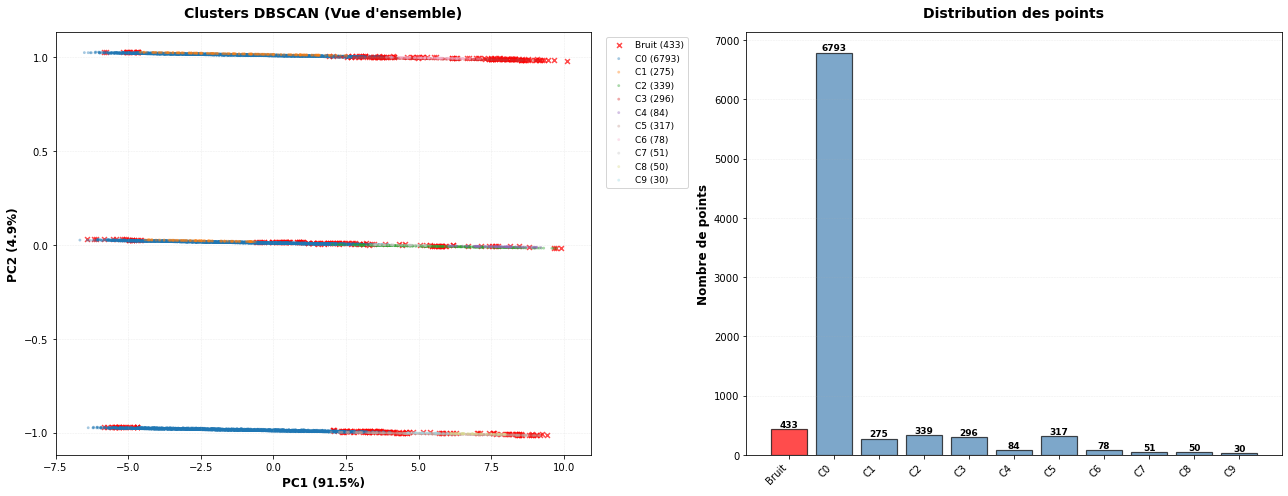


                  STATISTIQUES DÉTAILLÉES                   

Total de points                : 8746
Nombre de clusters             : 10
Points clusterisés             : 8313 (95.0%)
Points de bruit                : 433 (5.0%)

------------------------------------------------------------
                     DÉTAIL PAR CLUSTER                     
------------------------------------------------------------
Cluster         Nombre          Pourcentage    
------------------------------------------------------------
Bruit           433             4.95           %
Cluster 0       6793            77.67          %
Cluster 1       275             3.14           %
Cluster 2       339             3.88           %
Cluster 3       296             3.38           %
Cluster 4       84              0.96           %
Cluster 5       317             3.62           %
Cluster 6       78              0.89           %
Cluster 7       51              0.58           %
Cluster 8       50              0.57   

In [10]:
visualiser_clusters(X_train,labels)


VISUALISATION SÉPARÉE PAR CLUSTER



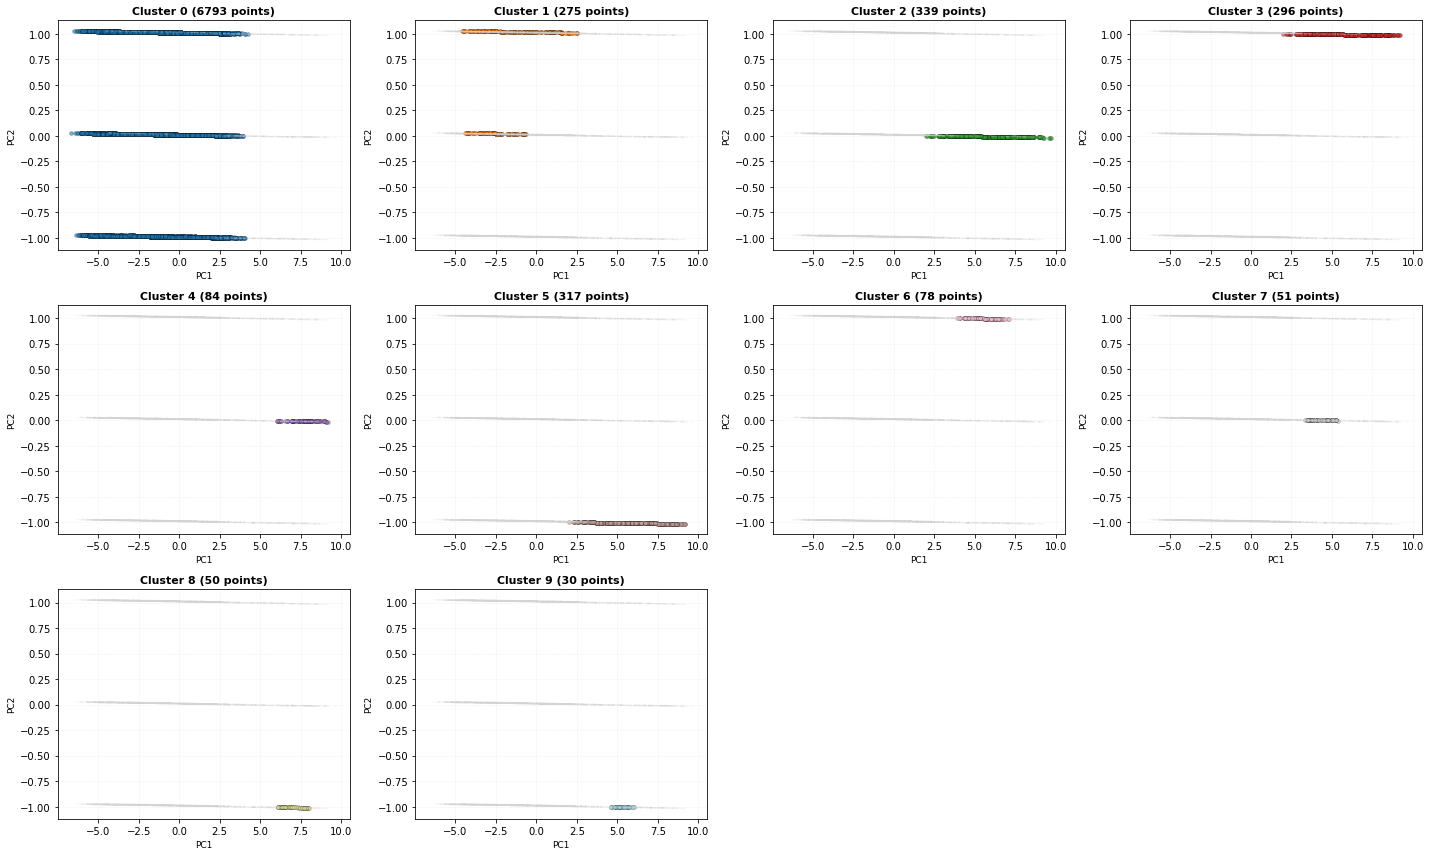

✅ Visualisation séparée réussie !



In [11]:
visualiser_clusters_separes(X_train,labels)

In [12]:
afficher_stats(labels)


                  STATISTIQUES DÉTAILLÉES                   

Total de points                : 8746
Nombre de clusters             : 10
Points clusterisés             : 8313 (95.0%)
Points de bruit                : 433 (5.0%)

------------------------------------------------------------
                     DÉTAIL PAR CLUSTER                     
------------------------------------------------------------
Cluster         Nombre          Pourcentage    
------------------------------------------------------------
Bruit           433             4.95           %
Cluster 0       6793            77.67          %
Cluster 1       275             3.14           %
Cluster 2       339             3.88           %
Cluster 3       296             3.38           %
Cluster 4       84              0.96           %
Cluster 5       317             3.62           %
Cluster 6       78              0.89           %
Cluster 7       51              0.58           %
Cluster 8       50              0.57   

In [13]:
calculer_silhouette(X_train,labels)


CALCUL DU SILHOUETTE SCORE

Calcul sur 8313 points (bruit exclu)...

Score de Silhouette            : -0.0344

Interprétation                 :
  ❌ Mauvais (< 0)




-0.034401761155603804


VISUALISATION DBSCAN
Points totaux : 8746
Features : 6
Variance expliquée PCA : 96.4%
Clusters trouvés : 10
Points de bruit : 433 (5.0%)



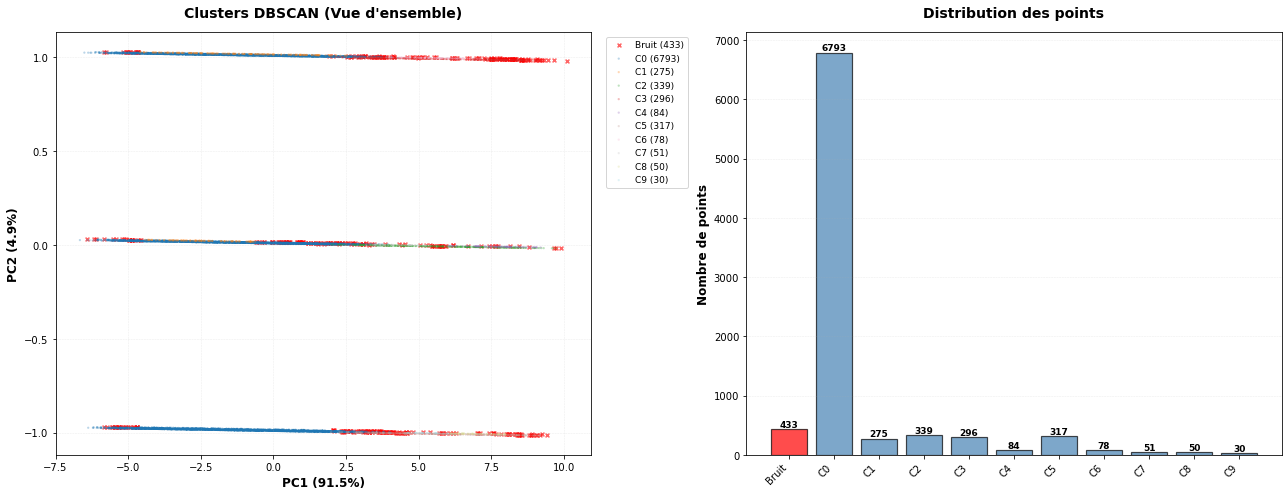


                  STATISTIQUES DÉTAILLÉES                   

Total de points                : 8746
Nombre de clusters             : 10
Points clusterisés             : 8313 (95.0%)
Points de bruit                : 433 (5.0%)

------------------------------------------------------------
                     DÉTAIL PAR CLUSTER                     
------------------------------------------------------------
Cluster         Nombre          Pourcentage    
------------------------------------------------------------
Bruit           433             4.95           %
Cluster 0       6793            77.67          %
Cluster 1       275             3.14           %
Cluster 2       339             3.88           %
Cluster 3       296             3.38           %
Cluster 4       84              0.96           %
Cluster 5       317             3.62           %
Cluster 6       78              0.89           %
Cluster 7       51              0.58           %
Cluster 8       50              0.57   

In [14]:
# si trop dense
visualiser_clusters(X_train, labels, taille_points=5, transparence=0.3)


VISUALISATION SÉPARÉE PAR CLUSTER



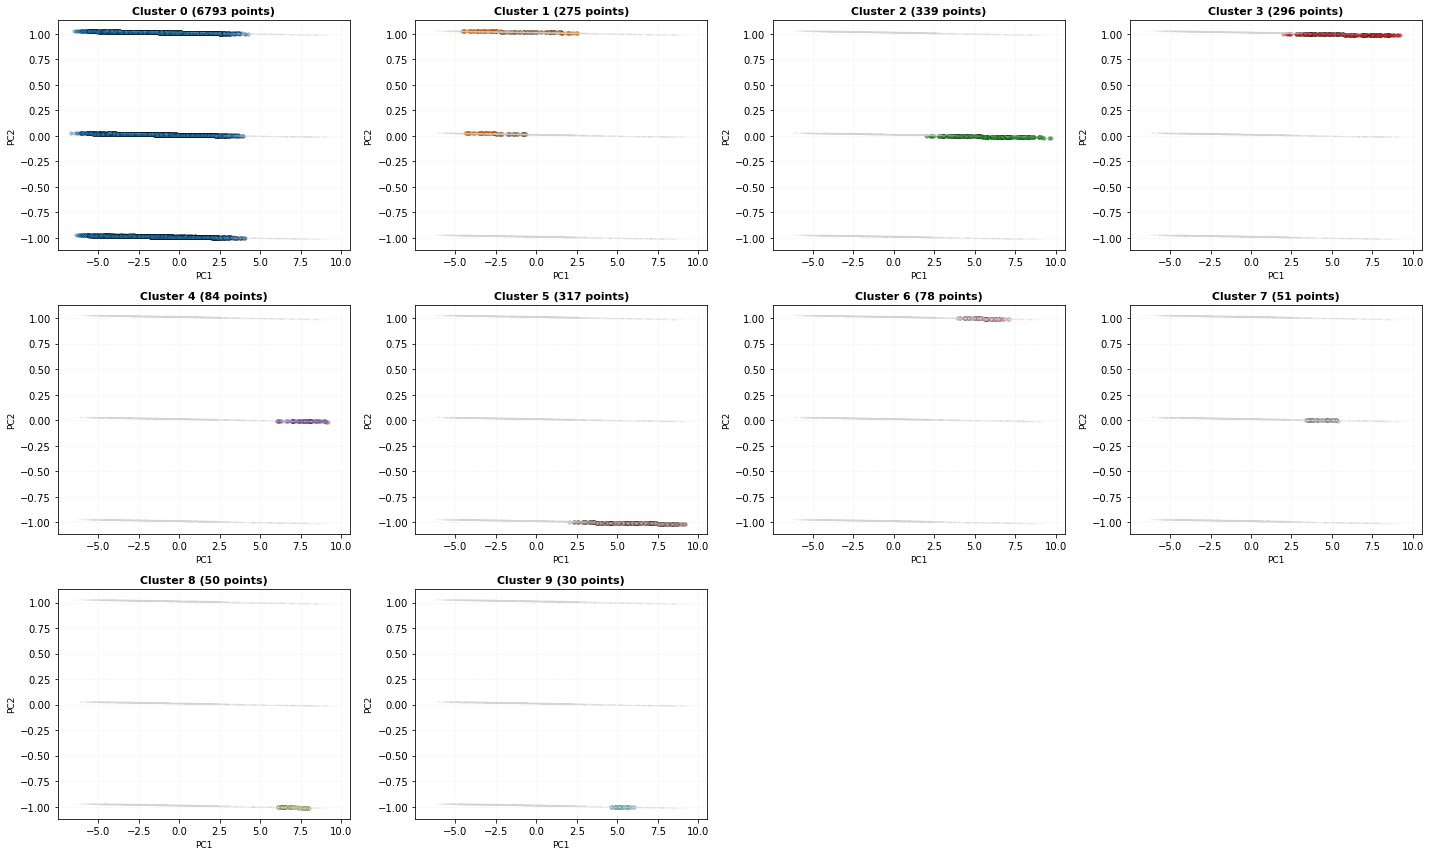

✅ Visualisation séparée réussie !



In [15]:
visualiser_clusters_separes(X_train, labels, taille_points=8, transparence=0.4)